<a href="https://colab.research.google.com/github/plaban1981/Langchain_usecases/blob/main/Copy_of_Advanced_RAG_ParentDocumentRetriever.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

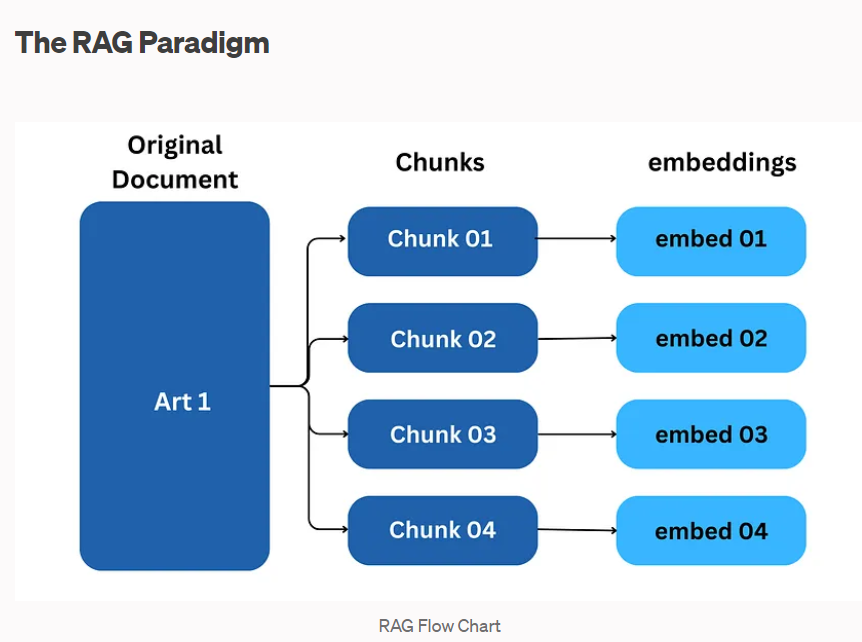

## The Limitations of Traditional Embeddings
While traditional embeddings capture the essence of content, there’s an inherent challenge.

As documents grow in size and complexity, representing their multifaceted nature in a single embedding can lead to a loss of specificity.

It is not feasible to describe the plot of an epic novel in just one sentence; we might capture the overarching theme, but many nuances and subplots are left out.

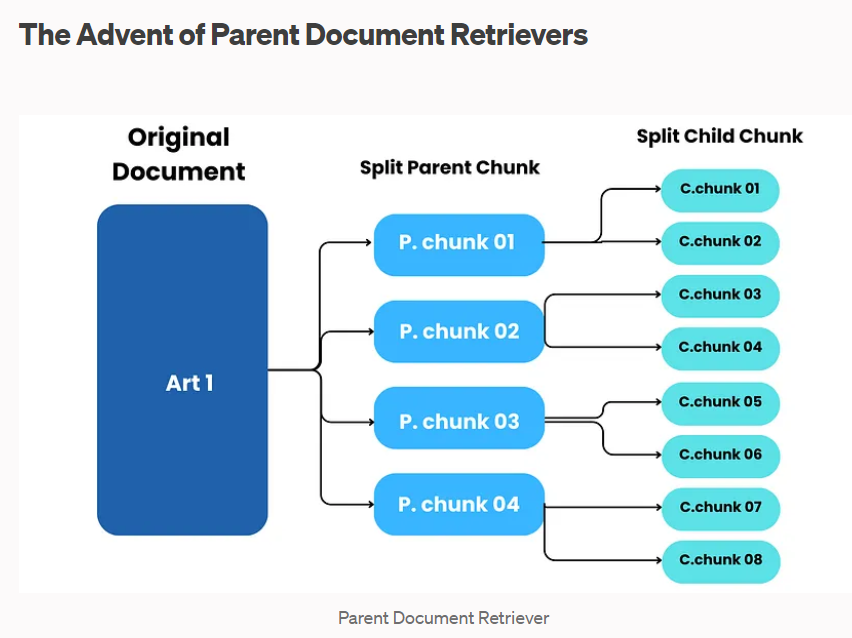

In [ ]:
!pip -q install langchain openai tiktoken chromadb lark
!pip -q install sentence_transformers
!pip -q install -U FlagEmbedding

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.1/448.1 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
! pip install -qU unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.1/275.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.5 MB/s eta 0:00:00


In [ ]:
!pip install -qU pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.6/276.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
!wget "https://www.dropbox.com/scl/fi/ulbt145sthizf2nazey49/langchain_blog_posts.zip?rlkey=9unhw0vukhlwacahmpnk5m591&dl=0" -O langchain_blog_posts.zip



--2023-10-22 14:12:38--  https://www.dropbox.com/scl/fi/ulbt145sthizf2nazey49/langchain_blog_posts.zip?rlkey=9unhw0vukhlwacahmpnk5m591&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd39562c691155ac589f41f80f7.dl.dropboxusercontent.com/cd/0/inline/CGF1nsHDoVn0REG7QTakS40KIOt4vTM88SrXkYUBX0DLru-uI79ZYXHGGZ6Vy9tBDGf-BOapKlGgWqkkOuB5R_JG-C1wKuOD4Lcx2cIYTKz8BvVylMJKCTVIkw0gLWaaAe4/file# [following]
--2023-10-22 14:12:39--  https://ucd39562c691155ac589f41f80f7.dl.dropboxusercontent.com/cd/0/inline/CGF1nsHDoVn0REG7QTakS40KIOt4vTM88SrXkYUBX0DLru-uI79ZYXHGGZ6Vy9tBDGf-BOapKlGgWqkkOuB5R_JG-C1wKuOD4Lcx2cIYTKz8BvVylMJKCTVIkw0gLWaaAe4/file
Resolving ucd39562c691155ac589f41f80f7.dl.dropboxusercontent.com (ucd39562c691155ac589f41f80f7.dl.dropboxusercontent.com)... 162.125.1.15, 2620:100:6019:15::a27d:40f
Conn

## Download Data

In [ ]:
!mkdir -p blog_posts
!unzip -q /content/langchain_blog_posts.zip -d blog_posts

In [ ]:
!mkdir -p docs

## Initialize OpenAI Api Keys

In [ ]:
import os
from getpass import getpass
#
os.environ["OPENAI_API_KEY"] = getpass("Enter your OpenAI API Key: ")


Enter your OpenAI API Key: ··········


## Parent Document Retriever
When splitting documents for retrieval, there are often conflicting desires:

* You may want to have small documents, so that their embeddings can most accurately reflect their meaning. If too long, then the embeddings can lose meaning.
* You want to have long enough documents that the context of each chunk is retained.


**The ParentDocumentRetriever** strikes that balance by splitting and storing small chunks of data.

During retrieval, it first fetches the small chunks but then looks up the parent ids for those chunks and returns those larger documents.


The Parent Document Retriever approach acknowledges the following things :

1. Capture the general essence of a document.
2. Recognize and represent the varied sub-contexts within.


Parent document retriever approach :

* Return full docs from smaller chunks look up
* Return bigger chunks for smaller chunks look up

## Load required dependencies

In [ ]:
from langchain.schema import Document
from langchain.vectorstores import Chroma
from langchain.retrievers import ParentDocumentRetriever

## Text Splitting & Docloader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.storage import InMemoryStore
from langchain.document_loaders import TextLoader,PyPDFDirectoryLoader,PyPDFLoader,DirectoryLoader

## LLM
from langchain.llms import OpenAI


## BGE Embeddings

In [ ]:
from langchain.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-small-en-v1.5"
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity

bge_embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs={'device': 'cuda'},
    encode_kwargs=encode_kwargs
)

## Load the data from the Data Directory

In [ ]:
#pdf_folder_path = "/content/docs"
txt_folder_path = "/content/blog_posts"
loader = loader = DirectoryLoader(txt_folder_path, glob="**/*.txt")
#loader = PyPDFDirectoryLoader(pdf_folder_path)
docs = loader.load()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
docs[0]

Document(page_content='URL: https://blog.langchain.dev/using-langsmith-to-support-fine-tuning-of-open-source-llms/ Title: Using LangSmith to Support Fine-tuning\n\nSummary\n\nWe created a guide for fine-tuning and evaluating LLMs using LangSmith for dataset management and evaluation. We did this both with an open source LLM on CoLab and HuggingFace for model training, as well as OpenAI\'s new finetuning service. As a test case, we fine-tuned LLaMA2-7b-chat and gpt-3.5-turbo for an extraction task (knowledge graph triple extraction) using training data exported from LangSmith and also evaluated the results using LangSmith. The CoLab guide is here.\n\nContext\n\nInterest in fine-tuning has grown rapidly over the past few weeks. This can largely be attributed to two causes.\n\nFirst, the open source LLM ecosystem has grown remarkably, progressing from open source LLMs that lagged the state-of-the-art (SOTA) by a wide margin to near-SOTA (e.g., Llama-2) LLMs that can be run on consumer lap

## Retrieving full documents rather than chunks

* This is good to use if the  initial full documents are not too big and we are not going to return many of them.

## Parent Document Retriever:

Approach:

 * documents are first identified and labeled as ```parent documents.```(More comprehensive source)

 * PDRs further segment these parent documents into ```child documents.```

 These child segments represent more specific themes or topics present within the overarching parent document.

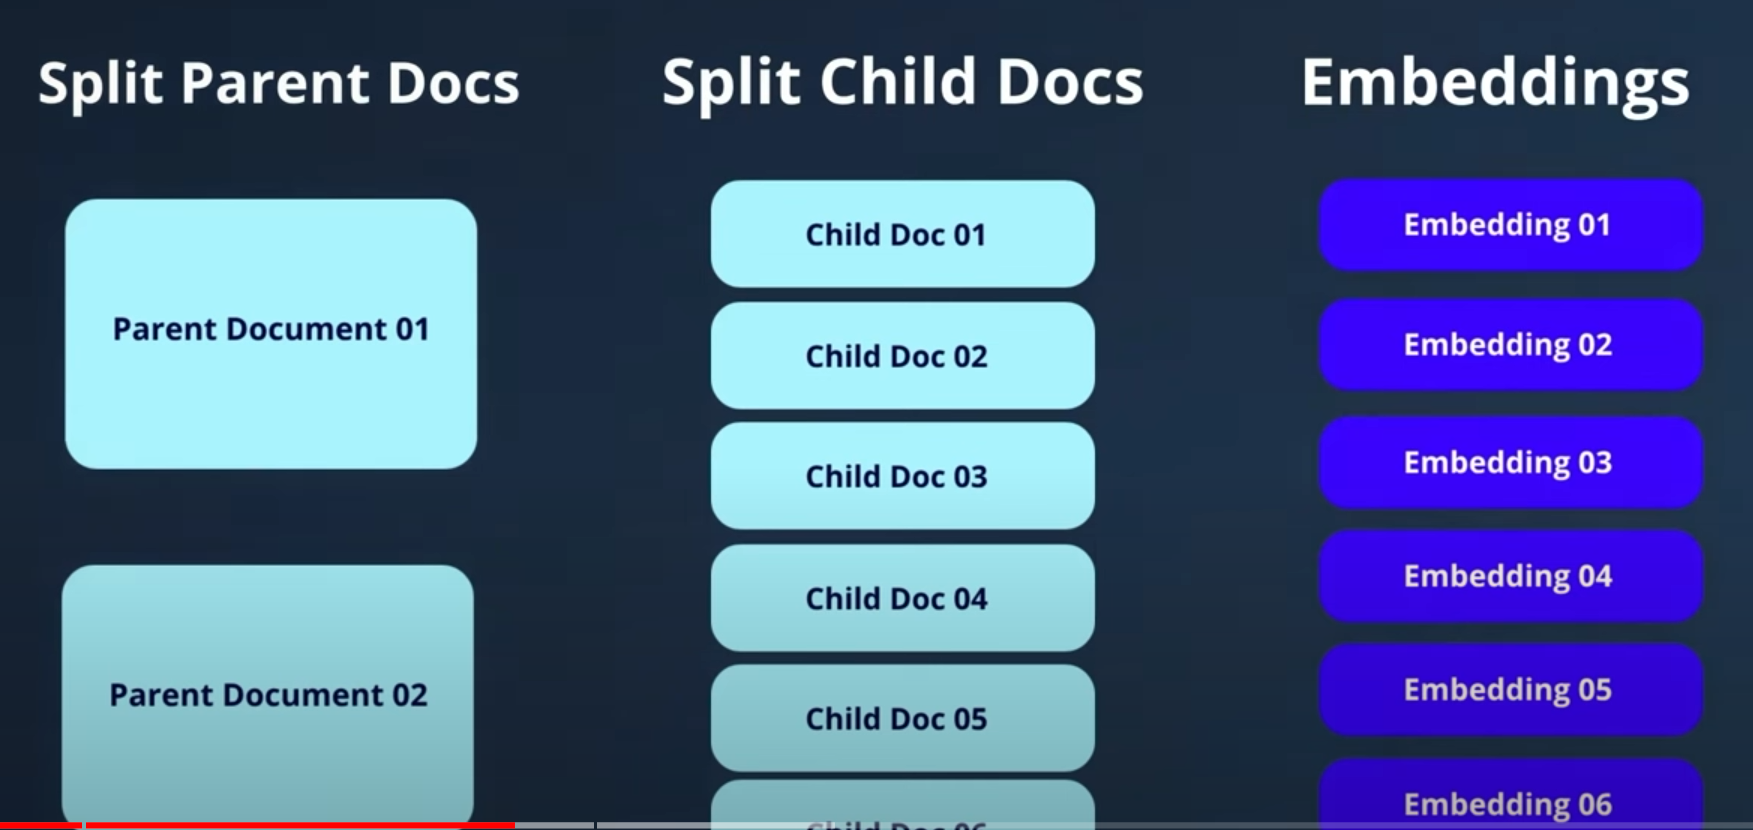

In [ ]:
# This text splitter is used to create the child documents
child_splitter = RecursiveCharacterTextSplitter(chunk_size=400)


# The vectorstore to use to index the child chunks
vectorstore = Chroma(
    collection_name="full_documents",
    embedding_function=bge_embeddings  #OpenAIEmbeddings()
)

# The storage layer for the parent documents
store = InMemoryStore()

full_doc_retriever = ParentDocumentRetriever(
    vectorstore=vectorstore,
    docstore=store,
    child_splitter=child_splitter,
)

In [ ]:
full_doc_retriever.add_documents(docs, ids=None,)

## List the number of documents added

In [ ]:
list(store.yield_keys())

['1aeb3c0c-f2a3-421f-a180-bd07714ec599',
 'b23d45dc-0d30-4ded-ab42-4631286fe9c7',
 '14aeb91f-91d8-4349-a737-a13255497a93',
 '78bb5d51-9d75-41fe-acd2-6e493f0271e0',
 '7fc5ef19-b084-44f2-8b22-6de12b775ad0',
 'a6f58524-59b9-49dc-b608-d21a0b0cbb29',
 'bf6db4b1-5864-4e6d-9593-01e4c15aac78',
 'f2e8f4a8-2309-4d20-bdba-09417003677b',
 'cfd711e7-bc7b-4c10-ad7f-4539821aa5fa',
 '89e3503a-97a4-40c9-baca-75f4d34341a2',
 '9d4bbbcd-c85b-40cb-809e-200cc2f6f4d6',
 'aa53cb03-234f-4151-9014-38bd7f521aa3',
 '5ead5cc6-2dfb-4947-b2a5-74da0e38b41e',
 'c6981b01-2775-4b13-bbcb-597a278dae84',
 '731b542c-436b-4c97-be6a-73d7ae6fe69c',
 'a40fbdd7-fc19-4344-8017-50feab720193',
 '4dbbbdec-b0eb-4380-8570-baf5a40d1d72',
 'aa089735-2e01-499f-a694-28f8d4761b13',
 'b0a51069-3143-4484-8370-bbbac83ac216',
 'b183c00d-944a-47c7-aca8-8c5506addefc',
 'a01966b5-45e6-483b-87b0-c35e76b5ec07',
 '689102c1-cd9d-4aae-9e68-db045fcbb98e',
 '716f3c78-3b2a-4a52-8f6a-0f32deec763a',
 'ee92f013-2e34-45ed-b62b-983df052f76b',
 '6733f033-4d6d-

* number of  documents were added

In [ ]:
print(f"number of documents added : {len(list(store.yield_keys()))}")

number of documents added : 52


## vector store search functionality

In [ ]:
sub_docs = vectorstore.similarity_search("what is langsmith")

In [ ]:
len(sub_docs)

4

In [ ]:
print(sub_docs[0].page_content)

What Is LangSmith?

LangSmith is a framework built on the shoulders of LangChain. It’s designed to track the inner workings of LLMs and AI agents within your product.

Those LLM inner-workings can be categorized into 4 main buckets - each with its own flair of usefulness. Here’s a breakdown of how they all work in unison and what you can expect.

Debugging:


In [ ]:
print(sub_docs[1].page_content)

What Are LangSmith Traces?


In [ ]:
print(sub_docs[2].page_content)

If you’re at the intersection of product, LLMs, and user experience, we’ve just walked so you can run. Time to read on.

What Is LangSmith?

LangSmith is a framework built on the shoulders of LangChain. It’s designed to track the inner workings of LLMs and AI agents within your product.


In [ ]:
print(sub_docs[3].page_content)


But is LangSmith robust enough for us to rely on entirely for our LLM-powered QA? Or is it just another nice-to-have feature for our ENG team?

If you’re at the intersection of product, LLMs, and user experience, we’ve just walked so you can run. Time to read on.

What Is LangSmith?


* ```we see that it returns small chunks (since we're storing the small chunks).```



## Retrieve relevant documents

In [ ]:
retrieved_docs = full_doc_retriever.get_relevant_documents("what is langsmith")

In [ ]:
len(retrieved_docs)


1

In [ ]:
len(retrieved_docs[0].page_content)

13989

In [ ]:
retrieved_docs[0].page_content

'URL: https://blog.langchain.dev/peering-into-the-soul-of-ai-decision-making-with-langsmith/ Title: Peering Into the Soul of AI Decision-Making with LangSmith\n\nEditor\'s Note: This post was written by Paul Thomson from Commandbar. They\'ve been awesome partners as they brought their application into production with LangSmith, and we\'re excited to share their story getting there.\n\nDo you ever wonder why you’re getting unhinged responses from ChatGPT sometimes? Or why the heck Midjourney is giving your creations 7 weird fingers? As intelligent as AI is supposed to be, it does produce some pretty unintelligent responses sometimes.\n\nNow, if you’re using GPT to write your next “let ‘em down easy breakup message”, the stakes are low - it doesn’t really matter. But if a core product feature is leveraging AI and your customers depend on super-intelligent perfection, you’re going to want some security and assurances that the outputs are up to scratch. Enter, LangSmith.\n\nSince the launc

* This returned large documents - since it returns the documents where the smaller chunks are located.

## Retrieving larger chunks

Sometimes, the full documents can be too big to want to retrieve them as is.

In that case, what we really want to do is to first split the raw documents into larger chunks, and then split it into smaller chunks. We then index the smaller chunks, but on retrieval we retrieve the larger chunks (but still not the full documents).

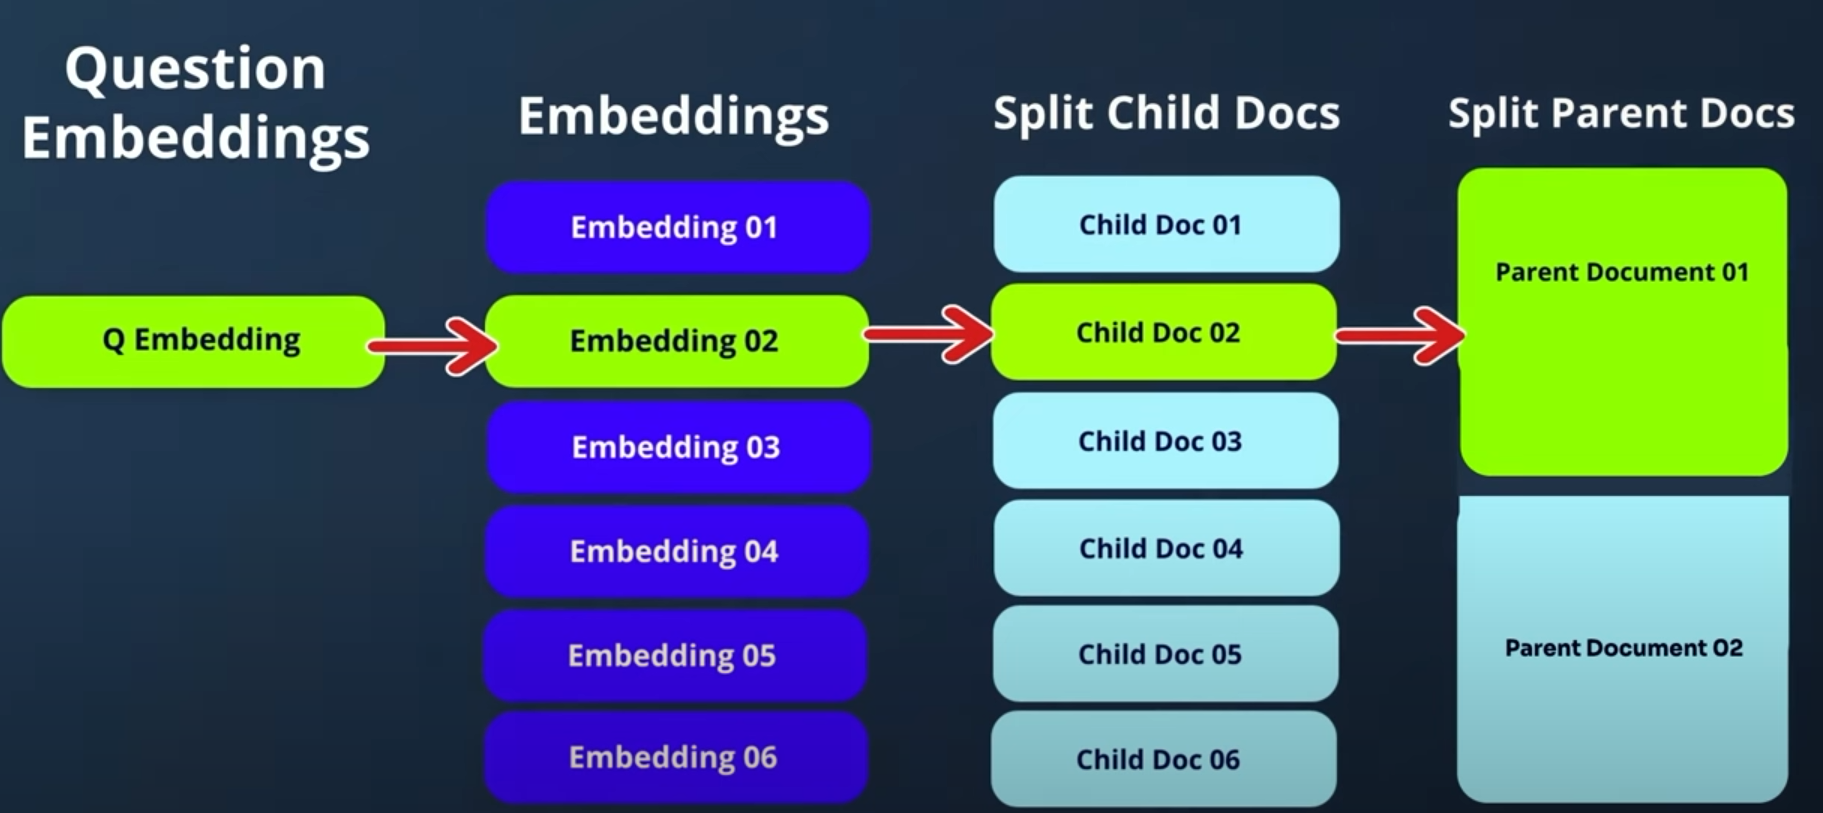

## Steps:

a. Traditional embeddings have limitations because as documents become larger and more complex, a single embedding cannot capture all their details. It is  like summarizing an epic novel in one sentence, where you only capture the main theme while missing out on the nuances and subplots.

b. To address this issue, the concept of Parent Document Retrievers (PDRs) emerged. PDRs acknowledge the need to capture the overall essence of a document while also recognizing and representing its various sub-contexts.

c. With Parent Document Retriever, documents are initially identified and ```labeled as 'parent documents,' serving as comprehensive sources or the 'big picture```.Instead of trying to fit all the content into one embedding, PDRs break these parent documents into 'child documents.' ```These child segments represent more specific themes or topics within the larger parent document```.

d. Each child document receives its own embedding, ensuring precision in reflecting its theme. However, ```during retrieval, the broader parent document is referenced, providing a comprehensive context to the language model. This approach balances pinpointed and specific search results with an expansive context for the model, ensuring a holistic view.

e. Parent Document Retrievers offer a dual advantage to Language Models (LLMs). They benefit from the precision of child document embeddings for accurate and relevant retrieval. Simultaneously, by referencing the parent documents during generation, they can access a broader context, leading to more comprehensive and nuanced responses.

## Navigating From Parent Documents to Child Documents

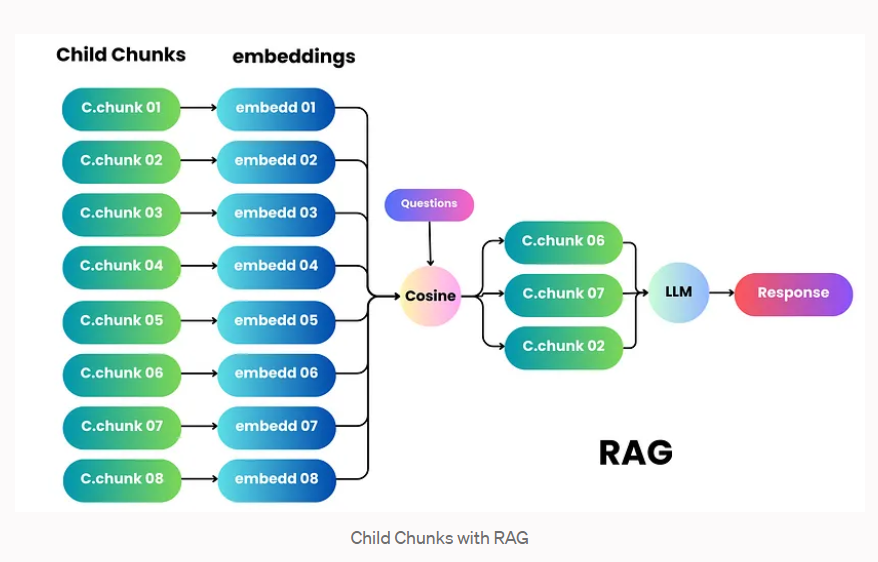

In [ ]:
# This text splitter is used to create the parent documents - The big chunks
parent_splitter = RecursiveCharacterTextSplitter(chunk_size=2000)

# This text splitter is used to create the child documents - The small chunks
# It should create documents smaller than the parent
child_splitter = RecursiveCharacterTextSplitter(chunk_size=400)

# The vectorstore to use to index the child chunks
vectorstore = Chroma(collection_name="split_parents",
                     embedding_function=bge_embeddings) #OpenAIEmbeddings()

# The storage layer for the parent documents
store = InMemoryStore()

## retrive larger chunks

In [ ]:
retriever = ParentDocumentRetriever(
    vectorstore=vectorstore,
    docstore=store,
    child_splitter=child_splitter,
    parent_splitter=parent_splitter,
)

In [ ]:
retriever.add_documents(docs)

In [ ]:
print(f"number of documents added : {len(list(store.yield_keys()))}")

number of documents added : 261


* We can see that there are much more documents now - these are the larger chunks.

In [ ]:
len(list(store.yield_keys()))

261

## Vector similarity

In [ ]:
sub_docs = vectorstore.similarity_search("what is langsmith")

In [ ]:
len(sub_docs)


4

In [ ]:
print(sub_docs[0].page_content)

What Is LangSmith?

LangSmith is a framework built on the shoulders of LangChain. It’s designed to track the inner workings of LLMs and AI agents within your product.

Those LLM inner-workings can be categorized into 4 main buckets - each with its own flair of usefulness. Here’s a breakdown of how they all work in unison and what you can expect.

Debugging:


In [ ]:
print(sub_docs[1].page_content)

What Are LangSmith Traces?


## Document Retrieval

In [ ]:
retrieved_docs = retriever.get_relevant_documents("what is langsmith")

In [ ]:
len(retrieved_docs)

2

* but when we had used full document retriever it returned only 1 doumnet where as in big chunk retriever two documents are retrieved

In [ ]:
len(retrieved_docs[0].page_content)

1918

In [ ]:
print(retrieved_docs[0].page_content)

URL: https://blog.langchain.dev/peering-into-the-soul-of-ai-decision-making-with-langsmith/ Title: Peering Into the Soul of AI Decision-Making with LangSmith

Editor's Note: This post was written by Paul Thomson from Commandbar. They've been awesome partners as they brought their application into production with LangSmith, and we're excited to share their story getting there.

Do you ever wonder why you’re getting unhinged responses from ChatGPT sometimes? Or why the heck Midjourney is giving your creations 7 weird fingers? As intelligent as AI is supposed to be, it does produce some pretty unintelligent responses sometimes.

Now, if you’re using GPT to write your next “let ‘em down easy breakup message”, the stakes are low - it doesn’t really matter. But if a core product feature is leveraging AI and your customers depend on super-intelligent perfection, you’re going to want some security and assurances that the outputs are up to scratch. Enter, LangSmith.

Since the launch of HelpHub

In [ ]:
print(retrieved_docs[1].page_content)

https://twitter.com/zhanghaili0610

LangChain vs LangSmith: What’s the difference?

While LangChain is the muscle doing the heavy lifting with Chains, Prompts, and Agents, understanding the 'why' behind the decisions LLMs make is a maze we often found ourselves lost in. That's where LangSmith shines, acting as an AI compass built into LangChain, guiding us through the intricate decision pathways and results that our chatbot generates.

"LangChain's (the company's) goal is to make it as easy as possible to develop LLM applications"

said Harrison Chase, co-founder and CEO of LangChain.

"To that end, we realized pretty early that what was needed - and missing - wasn't just an open source tool like LangChain, but also a complementary platform for managing these new types of applications. To that end, we built LangSmith - which is usable with or without LangChain and let's users easily debug, monitor, test, evaluate, and now (with the recently launched Hub) share and collaborate on their 

## Generate response based on the content supplied by the LLM using RetrievalQA Chain

In [ ]:
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI

qa = RetrievalQA.from_chain_type(llm=OpenAI(),
                                 chain_type="stuff",
                                 retriever=retriever)#big chunk retriever

In [ ]:
query = "What is Langsmith?"
qa.run(query)

" Langsmith is a framework built on the shoulders of LangChain. It’s designed to track the inner workings of LLMs and AI agents within a product, allowing users to debug, monitor, test, evaluate, and now (with the recently launched Hub) share and collaborate on their LLM applications. It also provides visual traces to help users understand the AI's journey and the underlying thought process and actions taken at each juncture."

## Question 2

In [ ]:
retv_docs = retriever.get_relevant_documents("what is RAGAS")
print(len(retv_docs))


4


#### Retrieved Documnets

In [ ]:
print(retv_docs[0].page_content)


LLM prefers outputs their own outputs and when asked to compare between different outputs the relative position of those outputs matters more. LLMs can also have a bias toward a value when asked to score given a range and they also prefer longer responses. Refer to the Large Language Models are not Fair Evaluators paper for more. Ragas aims to work around these limitations of using LLMs to evaluate your QA pipelines while also providing actionable metrics using as little annotated data as possible, cheaper, and faster.

Introducing Ragas

Ragas is a framework that helps you evaluate your QA pipelines across these different aspects. It provides you with a few metrics to evaluate the different aspects of your QA systems namely

metrics to evaluate retrieval: offers context_relevancy and context_recall which give you the measure of the performance of your retrieval system. metrics to evaluate generation: offers faithfulness which measures hallucinations and answer_relevancy which measures

In [ ]:
print(retv_docs[1].page_content)

URL: https://blog.langchain.dev/evaluating-rag-pipelines-with-ragas-langsmith/ Title: Evaluating RAG pipelines with Ragas + LangSmith

Editor's Note: This post was written in collaboration with the Ragas team. One of the things we think and talk about a lot at LangChain is how the industry will evolve to identify new monitoring and evaluation metrics that evolve beyond traditional ML ops metrics. Ragas is an exciting new framework that helps developers evaluate QA pipelines in new ways. This post shows how LangSmith and Ragas can be a powerful combination for teams that want to build reliable LLM apps.

How important evals are to the team is a major differentiator between folks rushing out hot garbage and those seriously building products in the space.

This HackerNews comment emphasizes the importance of having a robust eval strategy when taking your application from a cool demo to a production-ready product. This is especially true when building LLM applications because of the underl

In [ ]:
print(retv_docs[2].page_content)

from langchain.smith import RunEvalConfig, run_on_dataset evaluation_config = RunEvalConfig( custom_evaluators=[eval_chains.values()], prediction_key="result", ) result = run_on_dataset( client, dataset_name, create_qa_chain, evaluation=evaluation_config, input_mapper=lambda x: x, ) # output # View the evaluation results for project '2023-08-24-03-36-45-RetrievalQA' at: # https://smith.langchain.com/projects/p/9fb78371-150e-49cc-a927-b1247fdb9e8d?eval=true

Open up the results and you will see something like this

This shows the output for each example in the training dataset and the Feedback columns show the evaluation results. Now if you want to dive more into the reasons for the scores and how to improve them, click on any single example and open the Feedback tab.

This will show you each score and if you open the pop-up icon it will point you to the evaluation run of the RagasEvaluatorChain.

You can analyze each result to see why it was so and this will give you ideas on how to im

In [ ]:
print(retv_docs[3].page_content)

If it is not found that means the retriever was not able to retrieve the information needed to support that statement.

Understanding how each Ragas metric works gives you clues as to how the evaluation was performed making these metrics reproducible and more understandable. One easy way to visualize the results from Ragas is to use the traces from LangSmith and LangSmith’s evaluation features. Let's look more into that now

Visualising the Evaluations with LangSmith

While Ragas provides you with a few insightful metrics, it does not help you in the process of continuously evaluation of your QA pipeline in production. But this is where LangSmith comes in.

LangSmith is a platform that helps to debug, test, evaluate, and monitor chains and agents built on any LLM framework. LangSmith offers the following benefits

a platform to create and store a test dataset and run evaluations. a platform to visualise and dig into the evaluation results. Makes Ragas metrics explainable and reproducib

In [ ]:
query = "What is RAGAS?"
qa.run(query)

'\n\nRagas is a framework that helps you evaluate your QA pipelines across different aspects such as retrieval, generation, and faithfulness. It provides you with metrics to measure the performance of your retrieval system (context_relevancy and context_recall) and your generation system (faithfulness and answer_relevancy). The harmonic mean of these 4 metrics gives you the Ragas score which is a single measure of the performance of your QA system across all the important aspects. Most of the measurements do not require any labeled data, making it easier for users to run it without worrying about building a human-annotated test dataset first.'